import pandas for data analysis,
import seaborn for heat map plot,
import matplotlib for plotting

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as yy
yy.use("ggplot")

read the file and show last five rows

In [3]:
data=pd.read_csv("weather.csv")
data.tail()

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility,Unnamed: 8
10273,31-Dec-2020,19:00,12,6.0,↑,77,1018,6.0,NaN
10274,31-Dec-2020,20:00,11,0.0,↑,77,1018,6.0,NaN
10275,31-Dec-2020,21:00,11,0.0,↑,77,1019,6.0,NaN
10276,31-Dec-2020,22:00,10,6.0,↑,82,1019,6.0,NaN
10277,31-Dec-2020,23:00,9,0.0,↑,87,1019,6.0,NaN


show a quick describtion of the data

In [4]:
data.describe()

,temp,wspeed,humidity,pressure,visibility,Unnamed: 8
count,10278.000000,10267.000000,10278.000000,10278.000000,9980.000000,0.0
mean,17.312123,10.376936,58.331874,1015.751605,6.268938,NaN
std,8.883857,9.013007,24.230456,4.557514,3.222518,NaN
min,0.000000,0.000000,3.000000,1000.000000,0.000000,NaN
25%,10.000000,4.000000,38.000000,1012.000000,5.000000,NaN
50%,16.000000,9.000000,59.000000,1016.000000,6.000000,NaN
75%,24.750000,17.000000,81.000000,1019.000000,7.000000,NaN
max,42.000000,74.000000,100.000000,1030.000000,16.000000,NaN


In [5]:
data=data.drop("Unnamed: 8",axis=1)

new dataframe contains only the data for January

In [6]:
jan=data[data.date.str.contains("Jan")]
jan.tail()

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility
2390,31-Jan-2020,19:00,7,26.0,↑,61,1017,6.0
2391,31-Jan-2020,20:00,7,32.0,↑,71,1017,6.0
2392,31-Jan-2020,21:00,7,32.0,↑,61,1018,6.0
2393,31-Jan-2020,22:00,7,33.0,↑,61,1018,7.0
2394,31-Jan-2020,23:00,6,24.0,↑,66,1018,7.0


In [7]:
jan["date"]=(pd.to_datetime(jan["date"])).dt.date

/home/roy/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


remove minutes from time column

In [8]:
jan.time=data.time.str.replace(r":.*",":00")

/tmp/ipykernel_4271/2957792546.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  jan.time=data.time.str.replace(r":.*",":00")


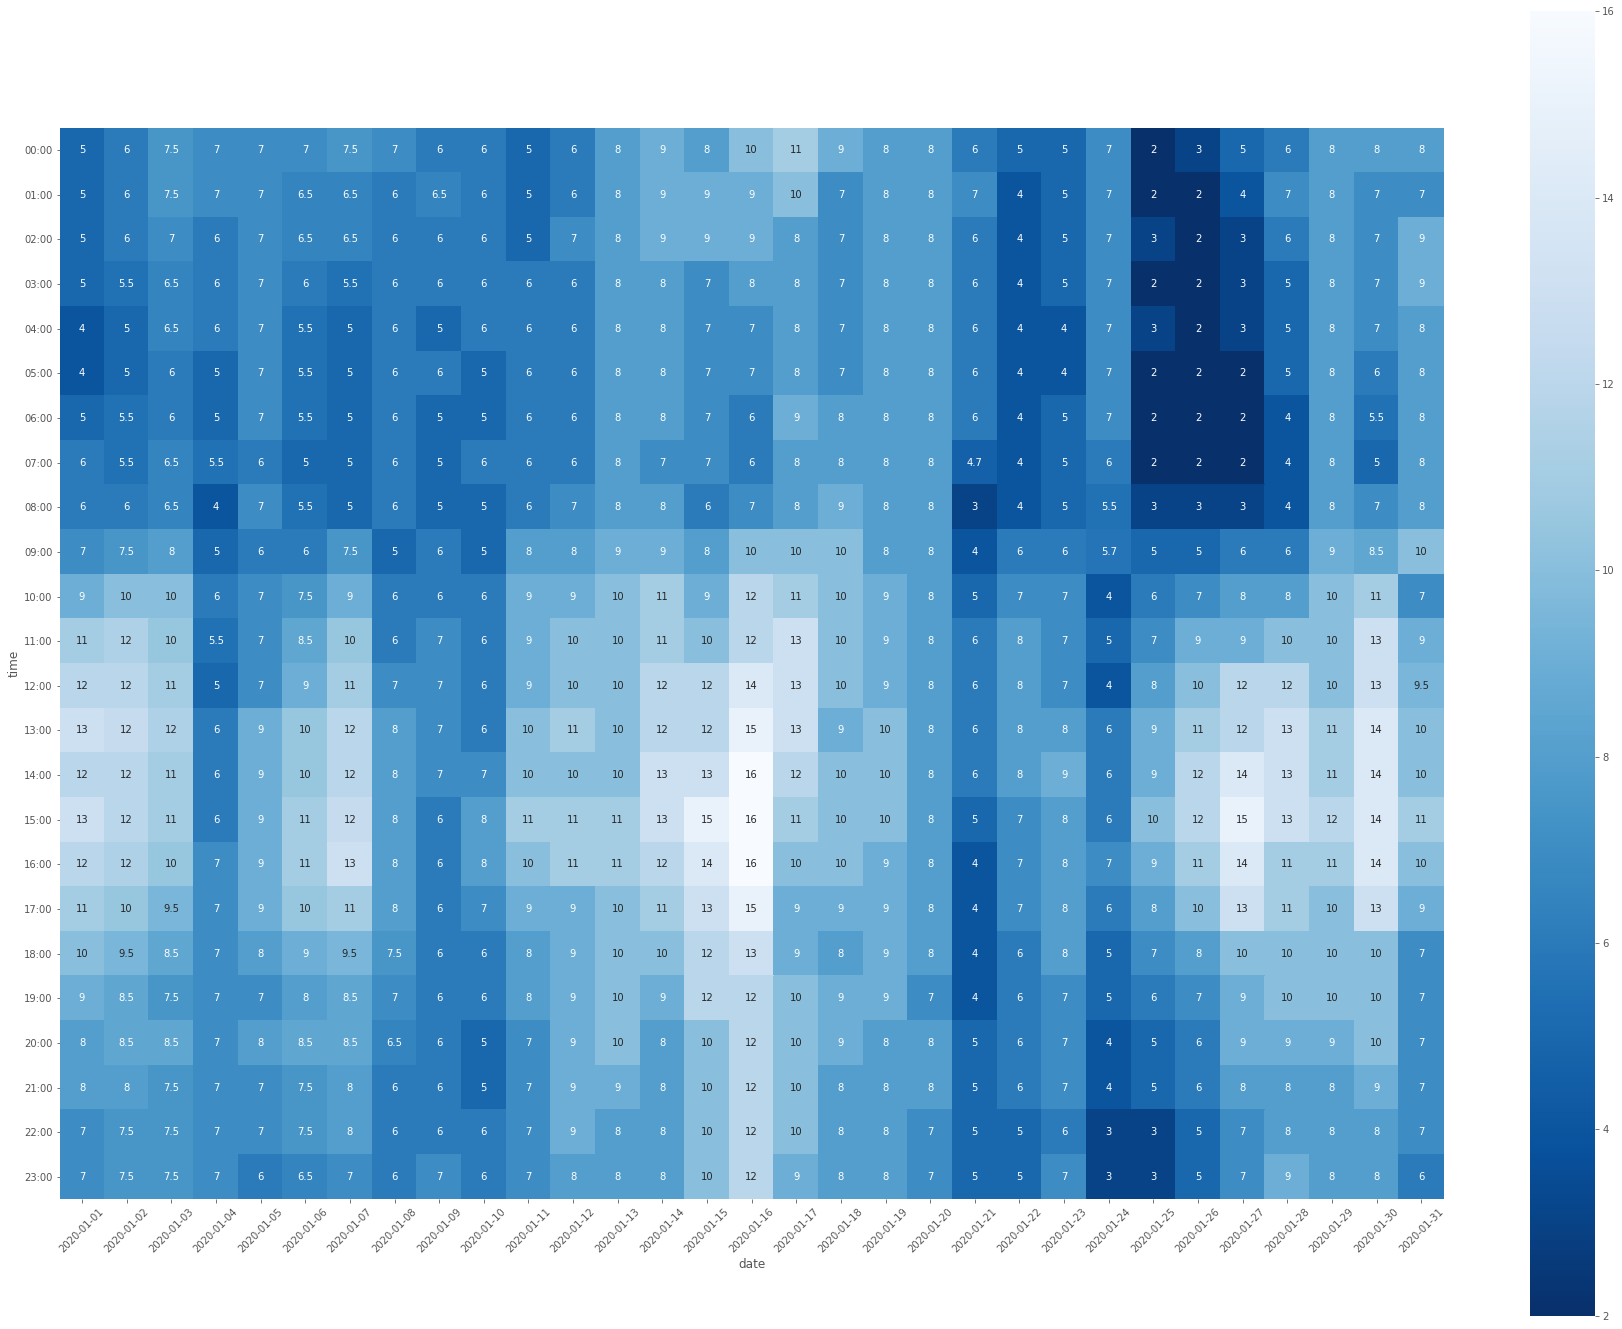

In [94]:
pivot_i=(jan.pivot_table(index="time",columns="date",values="temp"))
# # fill missing values
pivot_i.fillna(method="bfill",inplace=True)
fig,ax=plt.subplots(figsize=(31,24))
x=sns.heatmap(pivot_i,annot=True,square=True,cmap="Blues_r",yticklabels=True,xticklabels=True,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
xf=x.get_figure()

histogram plot of hourly temperatures all year round and january contribution

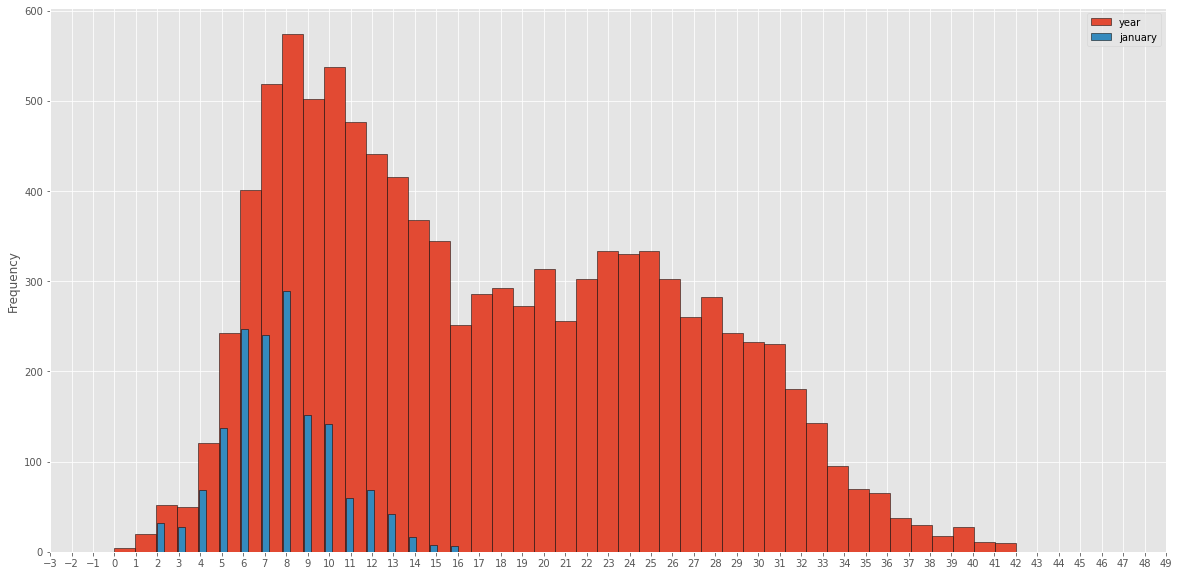

In [89]:
data.temp.plot.hist(bins=43,figsize=(20,10),edgecolor="black",label="all year")
jan.temp.plot.hist(bins=43,figsize=(20,10),edgecolor="black",label="january")
plt.xticks(range(-3,50))
plt.legend()

minimum, maximum and mean temperatures for each day during January

<AxesSubplot:xlabel='date'>

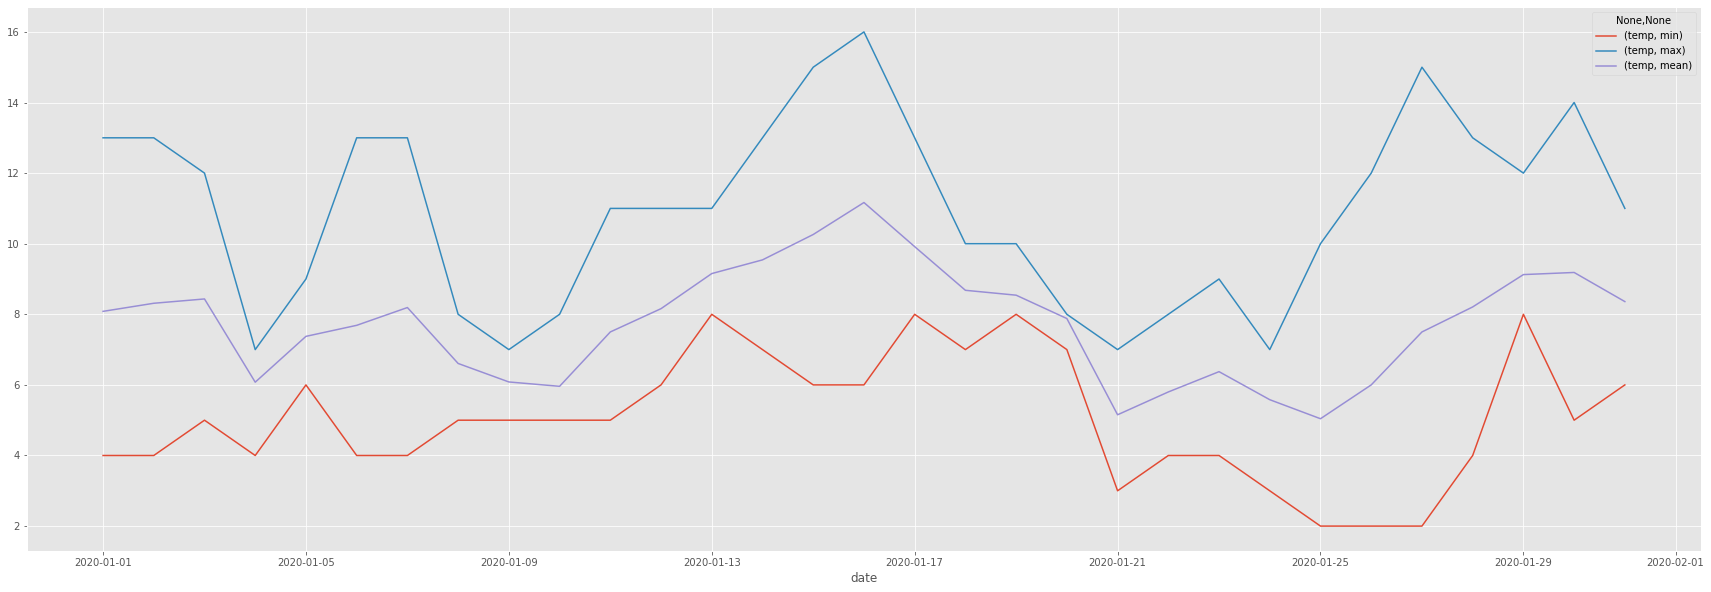

In [11]:
jan.groupby("date").agg({"temp":["min","max","mean"]}).plot(figsize=(30,10))

the relationship between temperature and humidity, which shows an inverse relationship

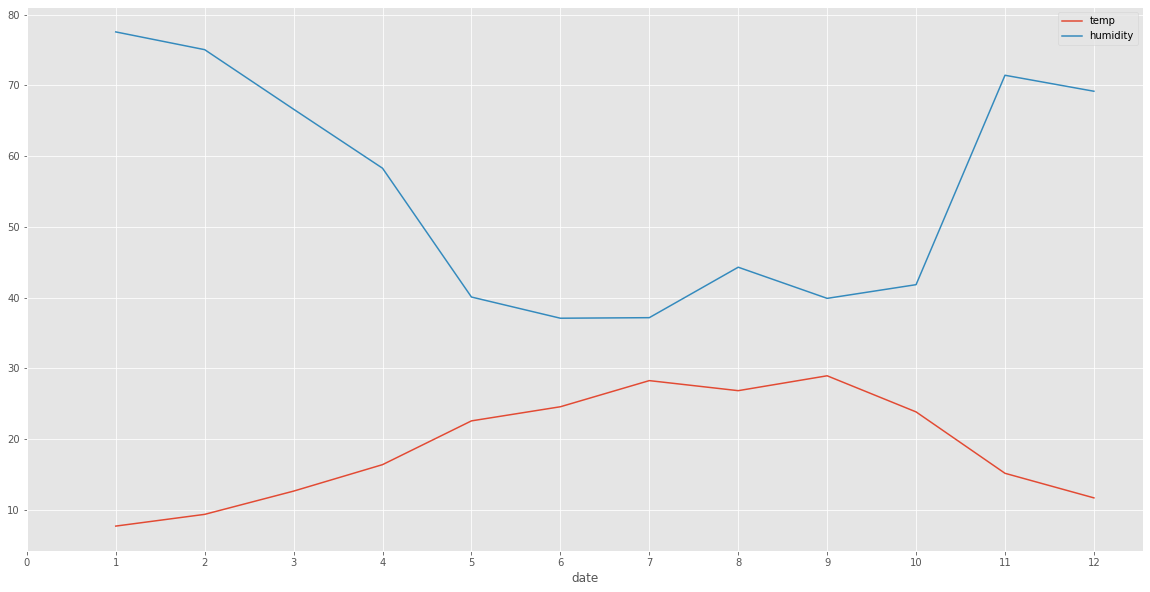

In [67]:
data.date=pd.to_datetime(data.date)
data.groupby(data.date.dt.month)[["temp","humidity"]].mean().plot(figsize=(20,10))
plt.xticks(range(0,13))
plt.show()